# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cloudiness = []
country = []
date = []
humidity = []
maxtemp = []
windspeed = []
latitude = []

url = "http://api.openweathermap.org/data/2.5/weather?"

print(f"Beginning Data Retrieval")
print(f"------------------------------")

for city in cities:
    
    query_url = f"{url}appid={api_key}&q={city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    try:
        cloudiness.append(weather_json['clouds'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        maxtemp.append(weather_json['main']['temp_max'])
        windspeed.append(weather_json['wind']['speed'])
        latitude.append(weather_json['coord']['lat'])
        print(f"Processing Record of city | {city}")
            
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
------------------------------
Processing Record of city | salalah
Processing Record of city | souillac
Processing Record of city | strelka
Processing Record of city | barra do garcas
Processing Record of city | pyinmana
Processing Record of city | ilulissat
Processing Record of city | albany
Processing Record of city | mikhaylovskoye
Processing Record of city | butaritari
Processing Record of city | port blair
Processing Record of city | lebu
Processing Record of city | hofn
Processing Record of city | hasaki
Processing Record of city | acopiara
Processing Record of city | panaba
City not found. Skipping...
Processing Record of city | banjar
Processing Record of city | port elizabeth
Processing Record of city | clyde river
Processing Record of city | porto novo
Processing Record of city | hilo
Processing Record of city | colares
Processing Record of city | zhanaozen
Processing Record of city | san ramon
Processing Record of city | rikitea
Processing Record of 

Processing Record of city | luau
Processing Record of city | mae hong son
Processing Record of city | watertown
Processing Record of city | flinders
Processing Record of city | dingtao
Processing Record of city | meadow lake
Processing Record of city | batagay
Processing Record of city | vilyuysk
City not found. Skipping...
Processing Record of city | goderich
Processing Record of city | maumere
Processing Record of city | provideniya
City not found. Skipping...
Processing Record of city | cabedelo
Processing Record of city | nova olimpia
Processing Record of city | padang
Processing Record of city | fiditi
Processing Record of city | kavieng
Processing Record of city | bayji
Processing Record of city | jamestown
Processing Record of city | pio xii
Processing Record of city | jalu
Processing Record of city | taoudenni
Processing Record of city | te anau
Processing Record of city | richards bay
Processing Record of city | metro
Processing Record of city | vitim
Processing Record of city

Processing Record of city | cherskiy
Processing Record of city | fort nelson
Processing Record of city | hallein
Processing Record of city | yenagoa
Processing Record of city | la romana
Processing Record of city | izhmorskiy
Processing Record of city | tongchuan
Processing Record of city | emerald
Processing Record of city | khor
Processing Record of city | abalak
Processing Record of city | manzhouli
Processing Record of city | preobrazheniye
Processing Record of city | ola
Processing Record of city | tevaitoa
Processing Record of city | tommot
Processing Record of city | bemidji
Processing Record of city | ishigaki
Processing Record of city | christchurch
Processing Record of city | san cristobal
Processing Record of city | isangel
Processing Record of city | zhaotong
Processing Record of city | venezuela
City not found. Skipping...
Processing Record of city | fergus falls
Processing Record of city | calama
Processing Record of city | port shepstone
Processing Record of city | sept-

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cloudiness_list = [measurement.get('all') for measurement in cloudiness]

In [6]:
weather_dict = {
    'City': cities,
    'Cloudiness': cloudiness_list,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Max Temp': maxtemp,
    'Wind Speed': windspeed,
    'Latitude': latitude
}
weather_data = pd.DataFrame.from_dict(weather_dict, orient='index')
weather_data = weather_data.transpose()
weather_data

,City,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Latitude
0,salalah,0,OM,1574532037,28,301.15,7.7,17.01
1,souillac,66,FR,1574532037,93,284.26,4.6,45.6
2,strelka,100,RU,1574532038,93,260.59,5.06,58.08
3,barra do garcas,63,BR,1574531774,37,309.19,1.05,-15.89
4,pyinmana,0,MM,1574532038,83,292.3,0.83,19.74
5,ilulissat,100,GL,1574532038,64,273.21,6.35,69.22
6,albany,40,US,1574531972,51,279.26,4.1,42.65
7,mikhaylovskoye,75,RU,1574532039,86,270.15,3,43.1
8,butaritari,54,KI,1574532036,67,301.8,4.19,3.07
9,port blair,0,IN,1574531834,69,300.88,5.06,11.67


In [7]:
final_weather_data = weather_data.dropna()
final_weather_data

,City,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Latitude
0,salalah,0,OM,1574532037,28,301.15,7.7,17.01
1,souillac,66,FR,1574532037,93,284.26,4.6,45.6
2,strelka,100,RU,1574532038,93,260.59,5.06,58.08
3,barra do garcas,63,BR,1574531774,37,309.19,1.05,-15.89
4,pyinmana,0,MM,1574532038,83,292.3,0.83,19.74
5,ilulissat,100,GL,1574532038,64,273.21,6.35,69.22
6,albany,40,US,1574531972,51,279.26,4.1,42.65
7,mikhaylovskoye,75,RU,1574532039,86,270.15,3,43.1
8,butaritari,54,KI,1574532036,67,301.8,4.19,3.07
9,port blair,0,IN,1574531834,69,300.88,5.06,11.67


In [13]:
final_weather_data.to_csv('Resources/weather_data.csv', index=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

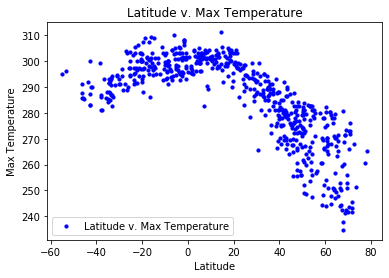

<Figure size 432x288 with 0 Axes>

In [21]:
x = final_weather_data['Latitude']
y = final_weather_data['Max Temp']

plt.scatter(x, y, label='Latitude v. Max Temperature', color='b', s=10, marker='o')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude v. Max Temperature')
plt.legend()
plt.show()
plt.savefig('Resources/lat_temp.png')

#### Latitude vs. Humidity Plot

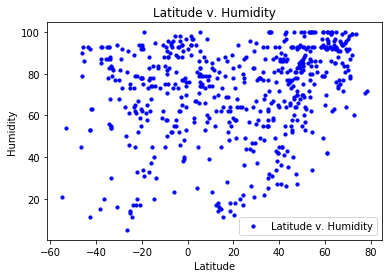

<Figure size 432x288 with 0 Axes>

In [15]:
x = final_weather_data['Latitude']
y = final_weather_data['Humidity']

plt.scatter(x, y, label='Latitude v. Humidity', color='b', s=10, marker='o')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude v. Humidity')
plt.legend()
plt.show()
plt.savefig('Resources/lat_hum.png')

#### Latitude vs. Cloudiness Plot

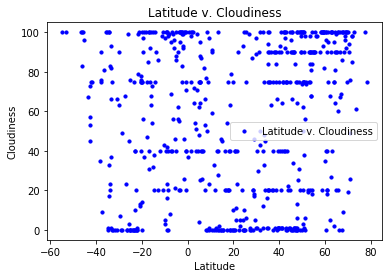

<Figure size 432x288 with 0 Axes>

In [16]:
x = final_weather_data['Latitude']
y = final_weather_data['Cloudiness']

plt.scatter(x, y, label='Latitude v. Cloudiness', color='b', s=10, marker='o')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude v. Cloudiness')
plt.legend()
plt.show()
plt.savefig('Resources/lat_cloud.png')

#### Latitude vs. Wind Speed Plot

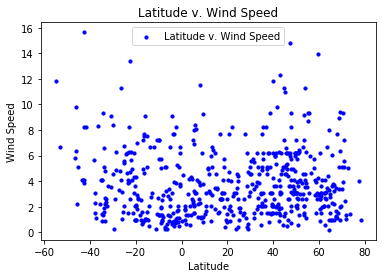

<Figure size 432x288 with 0 Axes>

In [17]:
x = final_weather_data['Latitude']
y = final_weather_data['Wind Speed']

plt.scatter(x, y, label='Latitude v. Wind Speed', color='b', s=10, marker='o')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude v. Wind Speed')
plt.legend()
plt.show()
plt.savefig('Resources/lat_windspeed.png')